<a href="https://colab.research.google.com/github/berberberk/timl-fs-2024/blob/main/TIML2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#@title Загрузка California Housing Dataset
data = fetch_california_housing()

# Создание DataFrame из данных
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target  # Добавляем целевую переменную (цены)

# Просмотр первых строк данных
print("Первые строки данных:")
print(df.head())

Первые строки данных:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
#@title Исследование корреляций

# Построение корреляционной матрицы
corr_matrix = df.corr()
print("\nКорреляционная матрица:")
print(corr_matrix)


Корреляционная матрица:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
PRICE       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     PRICE  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013

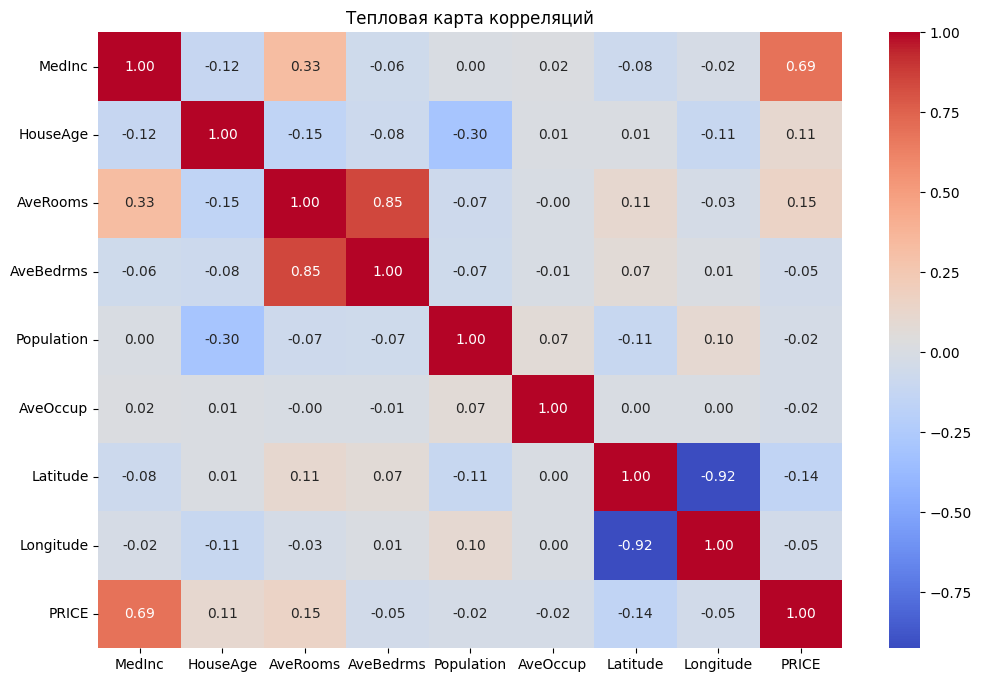

In [ ]:
# Визуализация тепловой карты корреляций

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

In [ ]:
# Поиск пар признаков с наибольшей и наименьшей корреляцией (кроме диагонали)

corr_matrix_unstacked = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strongest_correlation = corr_matrix_unstacked.max().idxmax()
weakest_correlation = corr_matrix_unstacked.min().idxmin()

print(f"\nПара признаков с наибольшей корреляцией: {strongest_correlation} - {corr_matrix_unstacked.max().max():.2f}")
print(f"Пара признаков с наименьшей корреляцией: {weakest_correlation} - {corr_matrix_unstacked.min().min():.2f}")



Пара признаков с наибольшей корреляцией: AveBedrms - 0.85
Пара признаков с наименьшей корреляцией: Longitude - -0.92
